# GIỚI THIỆU

Lý do chọn đề tài (Clustering – Spectral Clustering)\
• Tính ứng dụng cao: Clustering là công cụ quan trọng trong việc phân tích dữ liệu không nhãn,
giúp giải quyết các bài toán thực tế như phân nhóm khách hàng, phát hiện bất thường, và phân
đoạn hình ảnh.\
• Hạn chế của các phương pháp truyền thống: Các thuật toán như K-means thường không
hiệu quả với cụm dữ liệu phi tuyến tính hoặc phân bố không đồng đều, điều này thúc đẩy việc tìm
kiếm các phương pháp tốt hơn.\
• Ưu điểm nổi bật của Spectral Clustering: Nhờ sử dụng lý thuyết đồ thị, Spectral Clustering
xử lý tốt các cụm phức tạp và mang lại kết quả vượt trội trong các bài toán khó.\
• Phù hợp với dữ liệu hiện đại: Trong bối cảnh dữ liệu ngày càng phức tạp, Spectral Clustering
là công cụ phù hợp để phân tích dữ liệu phi cấu trúc và các tập dữ liệu lớn.

# QUY TRÌNH SPECTRAL CLUSTERING

#Bộ dữ liệu tham khảo


Sử dụng bộ dữ liệu Iris. Bộ dữ liệu với 150 mẫu

##4 đặc trưng bao gồm:
+ Sepal length (Chiều dài đài hoa)
+ Sepal width (Chiều rộng đài hoa)
+ Petal length (Chiều dài cánh hoa)
+ Petal width (Chiều rộng cánh hoa)

##Số nhãn (classes):
3 loài hoa:
+ Iris-setosa
+ Iris-versicolor
+ Iris-virginica

#Load data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets import load_iris

#Load dữ liệu Iris
iris = load_iris()
X = iris.data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(iris_df)



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

#Tìm sigma

In [ ]:
# Tính ma trận khoảng cách giữa các điểm
dist_matrix = pairwise_distances(X)

# Tính sigma là giá trị trung bình của ma trận khoảng cách
sigma = np.mean(dist_matrix)
print("Sigma hợp lý:", sigma)


Sigma hợp lý: 2.527677189277037


#Biểu diễn ma trận tương đồng tính được trên tập dữ liệu đã chọn

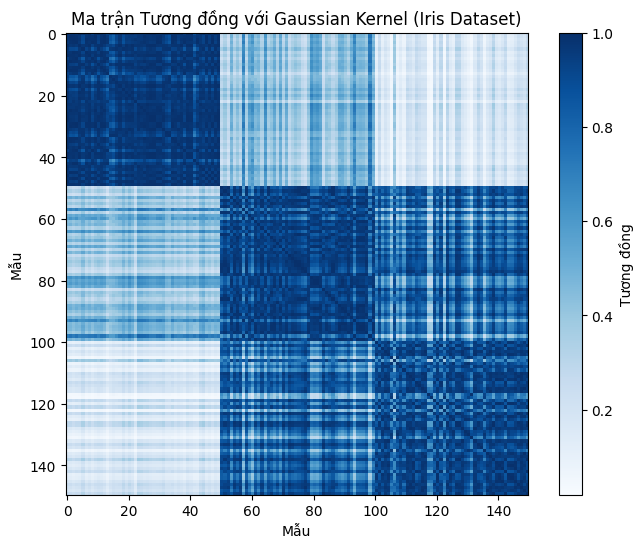

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
# Tải dữ liệu Iris
iris = datasets.load_iris()
data = iris.data  # Các đặc trưng (Sepal length, Sepal width, Petal length, Petal width)

# Tính khoảng cách Euclid giữa các mẫu
distances = euclidean_distances(data)

# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)

# Tính khoảng cách Euclidean trên dữ liệu đã scale
# distances = euclidean_distances(data_scaled)

# Thiết lập tham số sigma cho Gaussian Kernel
sigma = 2.527677189277037

# Tính ma trận tương đồng với Gaussian Kernel
sigma = 2.527677189277037  # Tham số điều chỉnh
W = np.exp(-distances**2 / (2 * sigma**2))

# Đảm bảo ma trận tương đồng là đối xứng và có giá trị trên đường chéo là 1
np.fill_diagonal(W, 1)


plt.figure(figsize=(8, 6))
plt.imshow(W, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Tương đồng")
plt.title("Ma trận Tương đồng với Gaussian Kernel (Iris Dataset)")
plt.xlabel("Mẫu")
plt.ylabel("Mẫu")
plt.show()


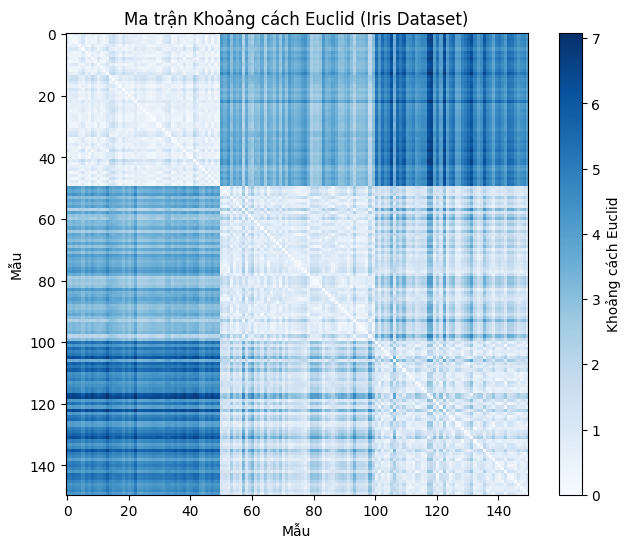

In [ ]:
distances = euclidean_distances(data)

# Vẽ ma trận khoảng cách Euclid với matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(distances, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Khoảng cách Euclid")
plt.title("Ma trận Khoảng cách Euclid (Iris Dataset)")
plt.xlabel("Mẫu")
plt.ylabel("Mẫu")
plt.show()

Tại sao lại có sự khác nhau giữa 2 ma trận như trên?

#Tính toán ma trận Laplacian và chuẩn hóa

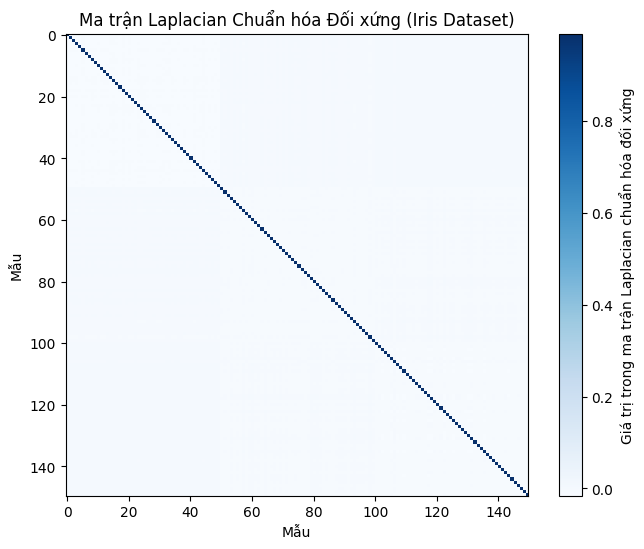

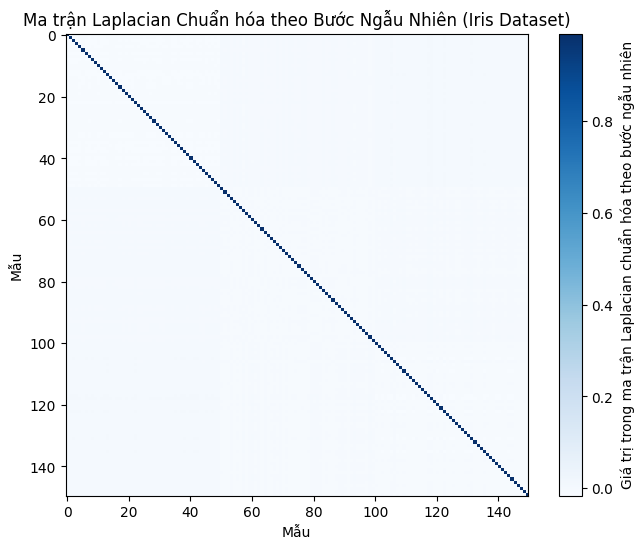

In [ ]:
from scipy.sparse.linalg import eigsh
from sklearn.preprocessing import normalize


# Load tập dữ liệu Iris
iris = load_iris()
X = iris.data  # Dữ liệu đặc trưng
y_true = iris.target  # Nhãn thực tế (không dùng trong phân cụm)

# Tính ma trận độ tương đồng (Gaussian similarity)
# def gaussian_similarity(X, sigma=2.527677189277037):
#     return pairwise_kernels(X, metric="rbf", gamma=1 / (2 * sigma**2))

# W = gaussian_similarity(X, sigma=2.527677189277037)  # Ma trận độ tương đồng

# Tính ma trận Laplacian chuẩn hóa
D = np.diag(np.sum(W, axis=1))  # Ma trận bậc
L = D - W
D_inv_sqrt = np.linalg.inv(np.sqrt(D))  # D^(-1/2)
L_sym = np.eye(len(W)) - D_inv_sqrt @ W @ D_inv_sqrt  # Ma trận Laplacian chuẩn hóa



# Chuẩn hóa Laplacian theo bước ngẫu nhiên: L_rw = D^(-1) * L
L_rw = np.linalg.inv(D) @ L

# Trực quan hóa ma trận Laplacian chuẩn hóa đối xứng
plt.figure(figsize=(8, 6))
plt.imshow(L_sym, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Giá trị trong ma trận Laplacian chuẩn hóa đối xứng")
plt.title("Ma trận Laplacian Chuẩn hóa Đối xứng (Iris Dataset)")
plt.xlabel("Mẫu")
plt.ylabel("Mẫu")
plt.show()

# Trực quan hóa ma trận Laplacian chuẩn hóa theo bước ngẫu nhiên
plt.figure(figsize=(8, 6))
plt.imshow(L_rw, cmap='Blues', interpolation='nearest')
plt.colorbar(label="Giá trị trong ma trận Laplacian chuẩn hóa theo bước ngẫu nhiên")
plt.title("Ma trận Laplacian Chuẩn hóa theo Bước Ngẫu Nhiên (Iris Dataset)")
plt.xlabel("Mẫu")
plt.ylabel("Mẫu")
plt.show()


#Tìm trị riêng và vector riêng

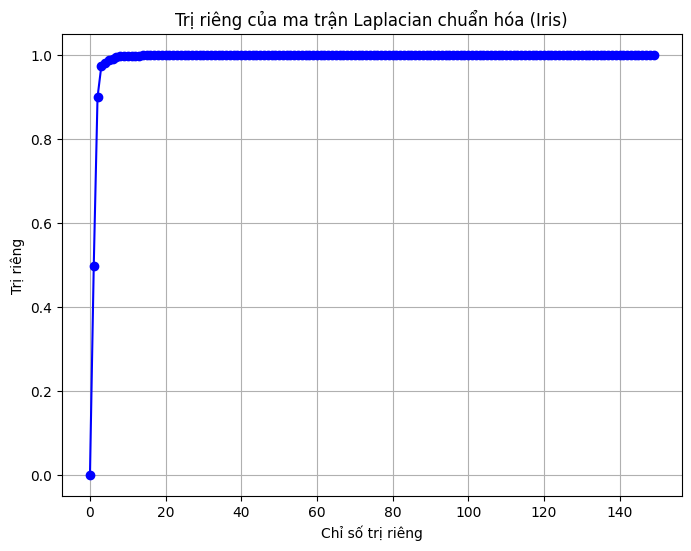

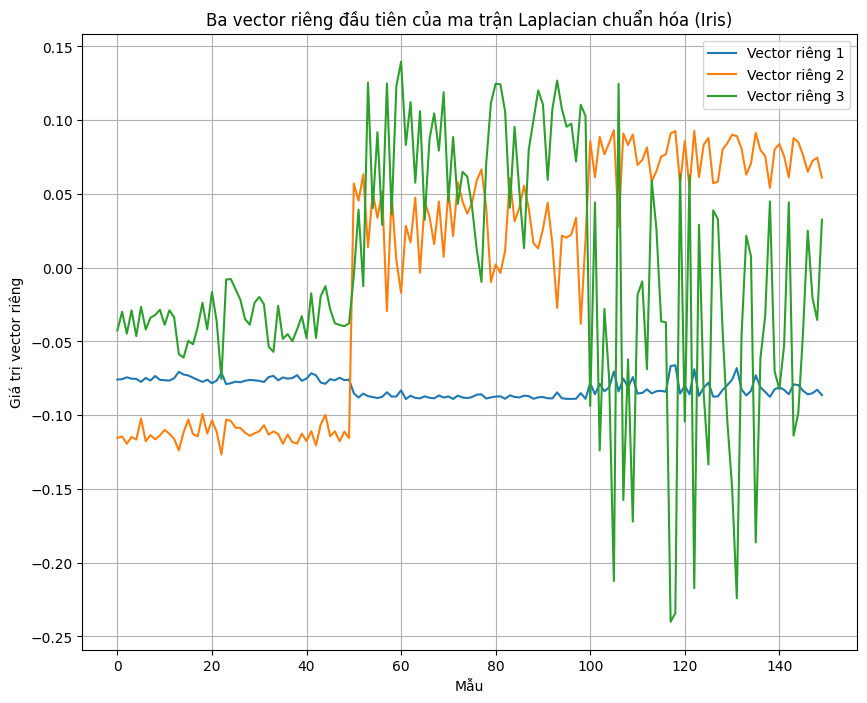

In [ ]:

# Tính trị riêng và vector riêng của ma trận Laplacian chuẩn hóa
eigenvalues, eigenvectors = np.linalg.eigh(L_sym)

# Trực quan hóa trị riêng
plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, marker='o', linestyle='-', color='b')
plt.title("Trị riêng của ma trận Laplacian chuẩn hóa (Iris)")
plt.xlabel("Chỉ số trị riêng")
plt.ylabel("Trị riêng")
plt.grid()
plt.show()

# Trực quan hóa các vector riêng liên quan đến 3 trị riêng nhỏ nhất
plt.figure(figsize=(10, 8))
for i in range(3):  # Ba vector riêng đầu tiên
    plt.plot(eigenvectors[:, i], label=f"Vector riêng {i+1}")
plt.title("Ba vector riêng đầu tiên của ma trận Laplacian chuẩn hóa (Iris)")
plt.xlabel("Mẫu")
plt.ylabel("Giá trị vector riêng")
plt.legend()
plt.grid()
plt.show()


#Tạo ma trận U từ k vector riêng

In [ ]:

# Tính 3 vectơ riêng nhỏ nhất
k = 3  # Số cụm mong muốn
eigvals, eigvecs = eigsh(L_sym, k=k, which='SM')  # Tính vectơ riêng nhỏ nhất
U = normalize(eigvecs, norm="l2", axis=1)  # Chuẩn hóa từng hàng của ma trận U


#Áp dụng k-means trên ma trận U đã chuẩn hóa

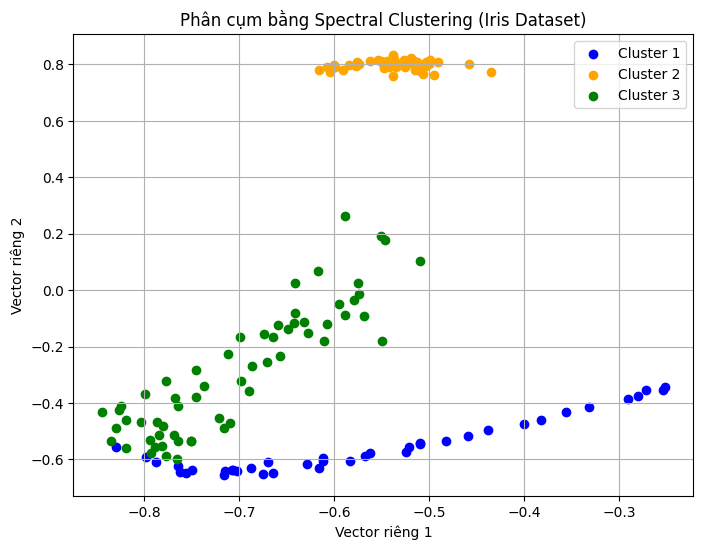

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
import numpy as np
# Áp dụng K-Means lên ma trận vectơ riêng U
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(U)
labelss = kmeans.labels_  # Nhãn dự đoán từ K-Means

# Giả sử 'labels' là nhãn phân cụm từ K-Means và 'y_true' là nhãn thực tế trong bộ dữ liệu Iris


# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(8, 6))
for i, color in zip(range(3), ['blue', 'orange', 'green']):
    plt.scatter(U[labelss == i, 0], U[labelss == i, 1], label=f'Cluster {i+1}', c=color)
plt.title("Phân cụm bằng Spectral Clustering (Iris Dataset)")
plt.xlabel("Vector riêng 1")
plt.ylabel("Vector riêng 2")
plt.legend()
plt.grid()
plt.show()


#Thử với các sigma khác nhau




Adjusted Rand Index (σ = 0.5): 0.562
Adjusted Rand Index (σ = 1.0): 0.621
Adjusted Rand Index (σ = 2.0): 0.610
Adjusted Rand Index (σ = 3.0): 0.590


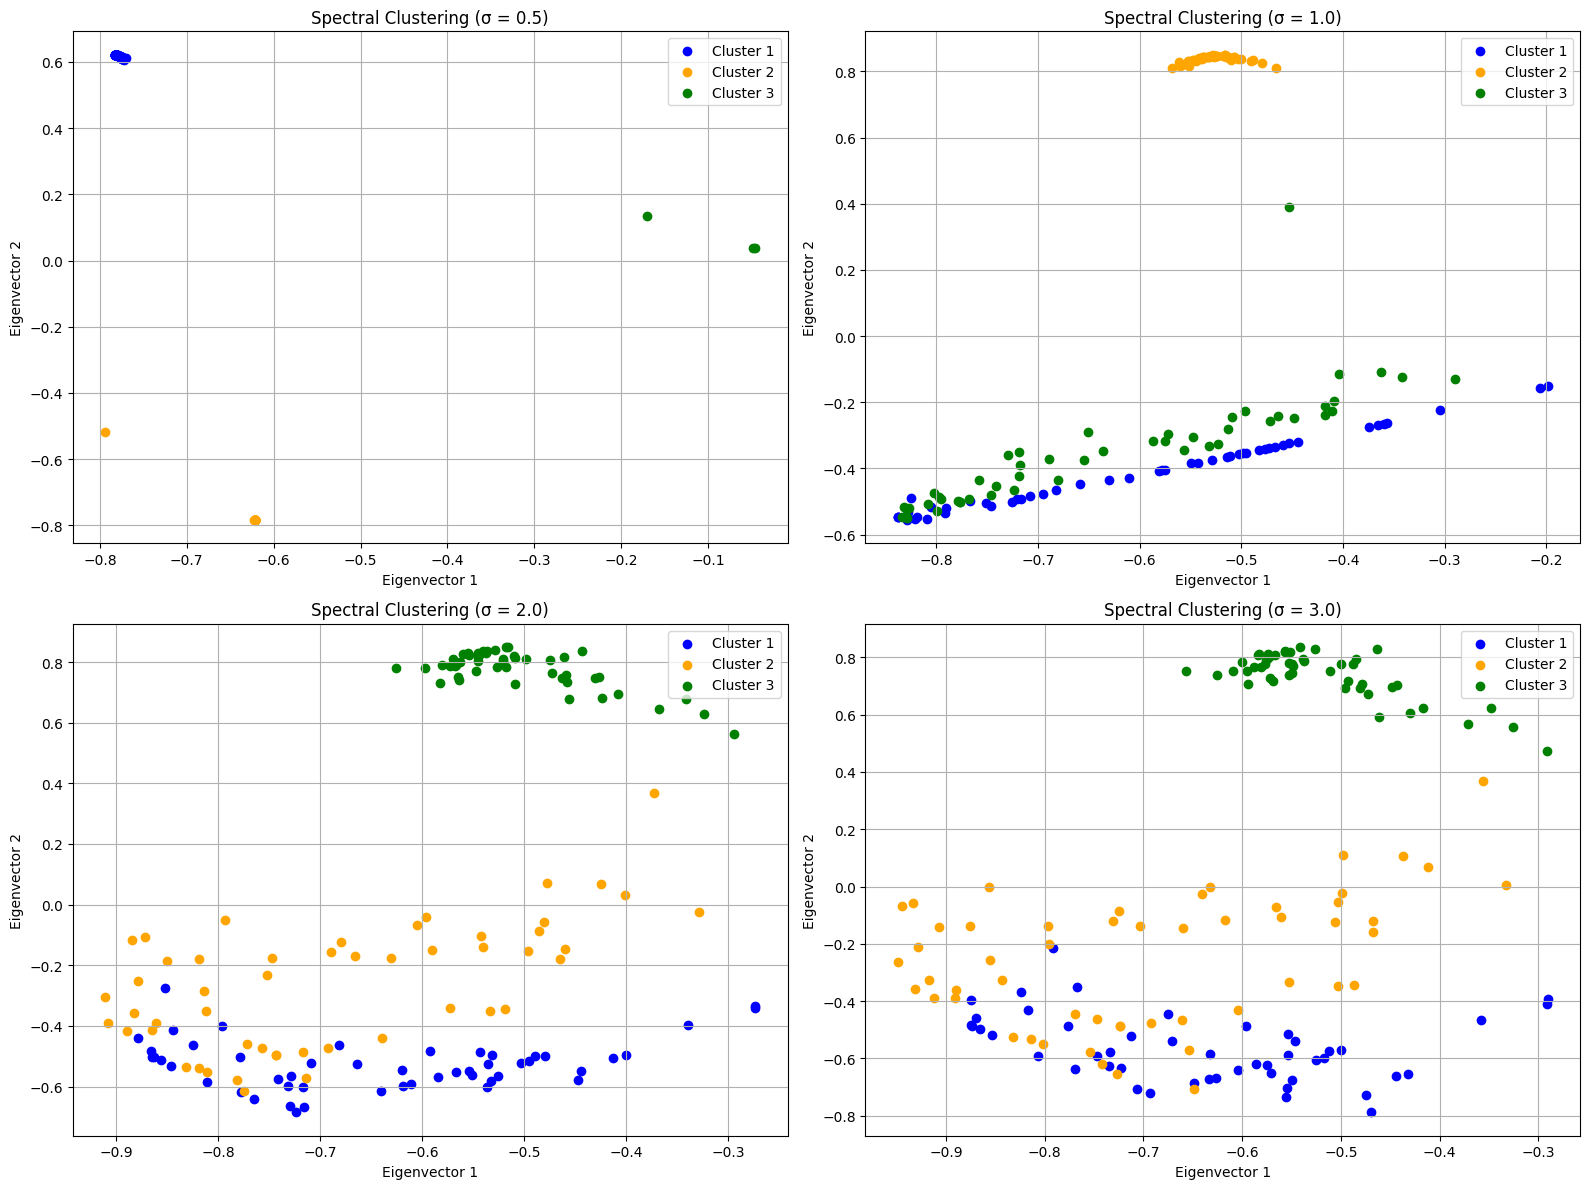

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.sparse.linalg import eigsh

# Load dữ liệu Iris
iris = load_iris()
data = iris.data
y_true = iris.target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Danh sách các giá trị sigma
sigma_values = [0.5, 1.0, 2.0, 3.0]

plt.figure(figsize=(16, 12))

for idx, sigma_value in enumerate(sigma_values, 1):
    # Tính ma trận khoảng cách Euclidean và ma trận trọng số W
    distances = euclidean_distances(data_scaled)
    W = np.exp(-distances**2 / (2 * sigma_value**2))  # Sử dụng sigma_value
    np.fill_diagonal(W, 1)  # Đảm bảo đối xứng và đường chéo là 1

    # Tính ma trận độ đo (degree matrix) và ma trận Laplacian chuẩn hóa (L_sym)
    D = np.diag(np.sum(W, axis=1))
    D_inv_sqrt = np.linalg.inv(np.sqrt(D))
    L_sym = np.eye(len(W)) - D_inv_sqrt @ W @ D_inv_sqrt

    # Lấy k eigenvectors nhỏ nhất của L_sym
    k = 3
    eigvals, eigvecs = eigsh(L_sym, k=k, which='SM')
    U = normalize(eigvecs, norm="l2", axis=1)  # Chuẩn hóa các eigenvectors

    # Phân cụm bằng K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(U)
    labels = kmeans.labels_

    # Đánh giá bằng Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(y_true, labels)
    print(f"Adjusted Rand Index (σ = {sigma_value}): {ari:.3f}")

    # Vẽ kết quả phân cụm
    plt.subplot(2, 2, idx)
    for cluster_idx, color in zip(range(k), ['blue', 'orange', 'green']):
        plt.scatter(U[labels == cluster_idx, 0], U[labels == cluster_idx, 1],
                    label=f'Cluster {cluster_idx + 1}', c=color)
    plt.title(f"Spectral Clustering (σ = {sigma_value})")
    plt.xlabel("Eigenvector 1")
    plt.ylabel("Eigenvector 2")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


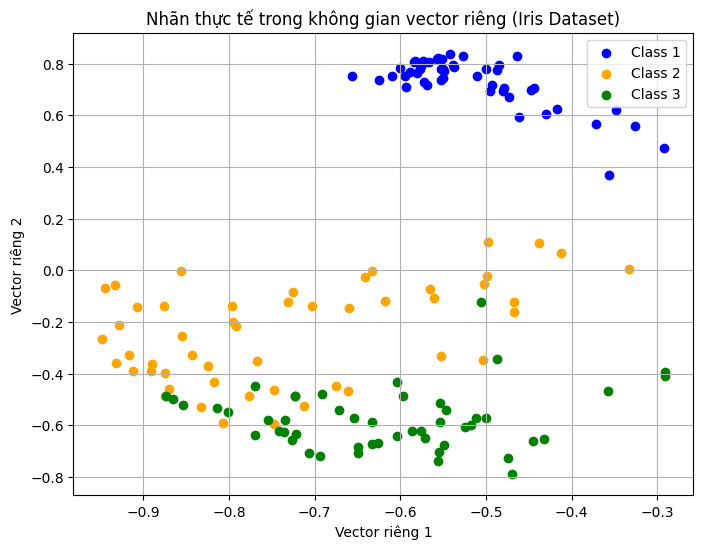

In [ ]:
# Trực quan hóa nhãn thực tế trong không gian vector riêng
y_true = iris.target  # Nhãn thực tế trong bộ dữ liệu Iris (Setosa, Versicolor, Virginica)
plt.figure(figsize=(8, 6))
for i, color in zip(range(3), ['blue', 'orange', 'green']):
    plt.scatter(U[y_true == i, 0], U[y_true == i, 1], label=f'Class {i+1}', c=color)
plt.title("Nhãn thực tế trong không gian vector riêng (Iris Dataset)")
plt.xlabel("Vector riêng 1")
plt.ylabel("Vector riêng 2")
plt.legend()
plt.grid()
plt.show()


#Đánh giá và so sánh

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

# Tính Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labelss)
print(f"Adjusted Rand Index (ARI): {ari}")

# Tính Confusion Matrix
conf_matrix = confusion_matrix(y_true, labels)
print("Confusion Matrix:")
print(conf_matrix)


Adjusted Rand Index (ARI): 0.7163421126838476
Confusion Matrix:
[[ 0  1 49]
 [12 38  0]
 [36 14  0]]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

# Bước 1: Load dữ liệu Iris
iris = load_iris()
X = iris.data  # Dữ liệu đặc trưng
y_true = iris.target  # Nhãn thực tế

# Bước 2: Áp dụng Spectral Clustering từ thư viện sklearn
spectral = SpectralClustering(
    n_clusters=3,  # Số cụm
    affinity='rbf',  # Ma trận tương đồng Gaussian kernel
    random_state=42
)
y_pred = spectral.fit_predict(X)  # Kết quả nhãn dự đoán

# Bước 3: Tính ARI
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index (ARI):", ari)



Adjusted Rand Index (ARI): 0.7455038681804481


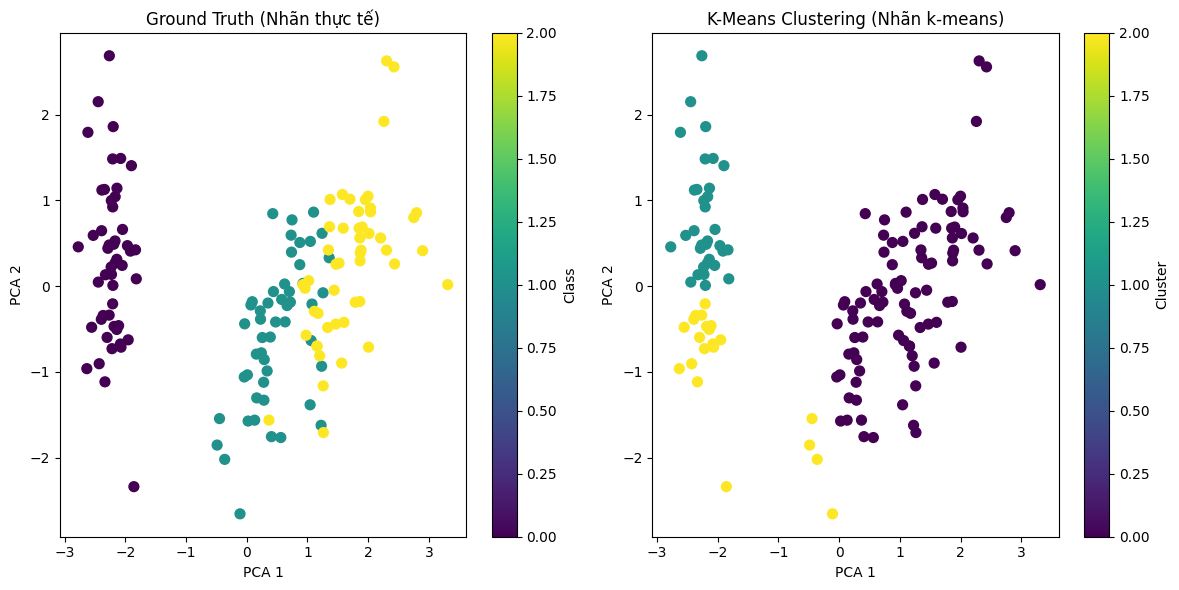

Adjusted Rand Index (ARI): 0.43


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load bộ dữ liệu Iris
iris = load_iris()
X = iris.data
y = iris.target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng PCA để giảm xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Áp dụng k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Trực quan hóa nhãn thực tế
plt.figure(figsize=(12, 6))

# Biểu đồ nhãn thực tế
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Ground Truth (Nhãn thực tế)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Class")

# Biểu đồ kết quả k-means
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title("K-Means Clustering (Nhãn k-means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")

plt.tight_layout()
plt.show()
from sklearn.metrics import adjusted_rand_score

# Tính Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y, y_kmeans)

print(f"Adjusted Rand Index (ARI): {ari:.2f}")



Chưa thực sự phân cụm rõ ràng

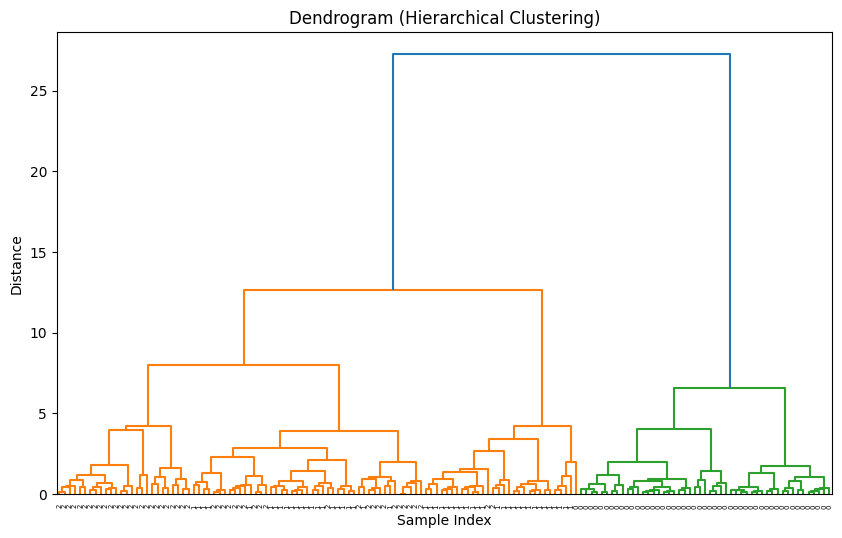

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load bộ dữ liệu Iris
iris = load_iris()
X = iris.data
y = iris.target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng Hierarchical Clustering
linked = linkage(X_scaled, method='ward')  # Ward là phương pháp phổ biến

# Trực quan hóa Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=y, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


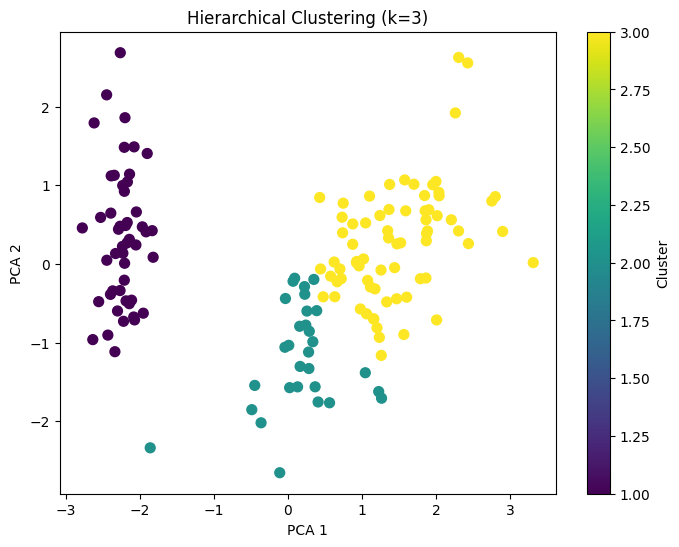

In [ ]:
from sklearn.decomposition import PCA

# Cắt cây để lấy số cụm k=3
clusters = fcluster(linked, t=3, criterion='maxclust')

# Giảm số chiều với PCA để trực quan hóa
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Trực quan hóa các cụm
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering (k=3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, accuracy_score
from scipy.cluster.hierarchy import fcluster

# Cắt cây để lấy số cụm k=3
clusters = fcluster(linked, t=3, criterion='maxclust')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, clusters))

# Adjusted Rand Index
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Accuracy (cần ánh xạ nhãn cụm với nhãn thực tế)
from scipy.optimize import linear_sum_assignment

# Tạo ma trận confusion
conf_mat = confusion_matrix(y, clusters)

# Sử dụng Hungarian algorithm để ánh xạ nhãn
row_ind, col_ind = linear_sum_assignment(-conf_mat)  # Hungarian tối ưu hóa
optimal_mapping = {col_ind[i]: row_ind[i] for i in range(len(row_ind))}

# Gán lại nhãn dự đoán theo ánh xạ tối ưu
mapped_clusters = [optimal_mapping[label] for label in clusters]




Confusion Matrix:
[[ 0 49  1  0]
 [ 0  0 27 23]
 [ 0  0  2 48]
 [ 0  0  0  0]]
Adjusted Rand Index (ARI): 0.62


Nhận xét:\
Spectral clustering thể hiện rõ sự nổi trội hơn khi xử lý tập dữ liệu phi tuyến tính iris khi chọn tham số sigma tối ưu nhất ta được ARI = 0.716 lớn hơn so với 2 thuật toán còn lại là K-means và Hierachical clustering

# ƯU, NHƯỢC ĐIỂM
Để có thể trực quan hóa một cách rõ ràng hơn thì bọn em xin sử dụng tập dữ liệu make_moons để nhìn thấy rõ sự thay đổi khi sử dụng các tham số sigma khác nhau. Với tập dữ liệu Iris ở trên bọn em sử dụng với mong muốn giải thích rõ lý thuyết của Spectral clustering khi sử dụng với tập dữ liệu có sự chồng lẫn và với mục đích so sánh với các thuật toán khác

In [ ]:
# Thêm các thư viện
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
# Tạo dữ liệu make_moons và make_circles
X_circles, y_circles = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
X_moons, y_moons = make_moons(1000, noise=.07, random_state=0)

# Chuẩn hóa dữ liệu
scaler_circles = StandardScaler()
X_circles_scaled = scaler_circles.fit_transform(X_circles)

scaler_moons = StandardScaler()
X_moons_scaled = scaler_moons.fit_transform(X_moons)


In [ ]:
# So sánh các phương pháp phân cụm
def compare_clustering_methods(X_scaled, dataset_name):
    # K-means Clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=2, random_state=42, n_init=10, eigen_solver='arpack', affinity='rbf')
    spectral_labels = spectral.fit_predict(X_scaled)

    # Trực quan hóa
    plt.figure(figsize=(16, 6))

    plt.subplot(121)
    scatter_kmeans = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title(f'{dataset_name} - K-means Clustering')
    plt.colorbar(scatter_kmeans)

    plt.subplot(122)
    scatter_spectral = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='viridis')
    plt.title(f'{dataset_name} - Spectral Clustering')
    plt.colorbar(scatter_spectral)

    plt.tight_layout()
    plt.show()

In [ ]:
# Ảnh hưởng của tham số Sigma đối với việc phân cụm
def sigma_parameter_impact(X_scaled, dataset_name):
    sigmas = [0.1, 0.5, 1.0, 2.0]

    plt.figure(figsize=(20, 4))

    # Giảm chiều trước khi chạy Spectral Clustering
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    for i, sigma in enumerate(sigmas, 1):
        plt.subplot(1, 4, i)
        spectral = SpectralClustering(n_clusters=2, random_state=42, affinity='rbf', gamma=1/(2*sigma**2), n_init=10)
        labels = spectral.fit_predict(X_pca)  # Sử dụng dữ liệu PCA

        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
        plt.title(f'{dataset_name} - Sigma = {sigma}')
        plt.colorbar(scatter)
        plt.xticks([])
        plt.yticks([])

    plt.suptitle(f'Ảnh Hưởng của Tham Số Sigma ({dataset_name})')
    plt.tight_layout()
    plt.show()

In [ ]:
# So sánh chi phí tính toán
def computational_complexity(X_scaled, dataset_name):
    from time import time

    # Tạo các tập dữ liệu với kích thước khác nhau
    sizes = [50, 100, 150, 200, 300]
    kmeans_times = []
    spectral_times = []

    for size in sizes:
        # Lấy một phần dữ liệu
        X_subset = X_scaled[:size]

        # Đo thời gian K-means
        start = time()
        KMeans(n_clusters=2, random_state=42).fit(X_subset)
        kmeans_times.append(time() - start)

        # Đo thời gian Spectral Clustering
        start = time()
        SpectralClustering(n_clusters=2, random_state=42, n_init=10).fit(X_subset)
        spectral_times.append(time() - start)

    plt.figure(figsize=(10, 6))
    plt.plot(sizes, kmeans_times, marker='o', label='K-means')
    plt.plot(sizes, spectral_times, marker='o', label='Spectral Clustering')
    plt.xlabel('Số lượng mẫu')
    plt.ylabel('Thời gian thực thi (giây)')
    plt.title(f'So Sánh Chi Phí Tính Toán ({dataset_name})')
    plt.legend()
    plt.show()

Phân tích trên bộ dữ liệu make_moons


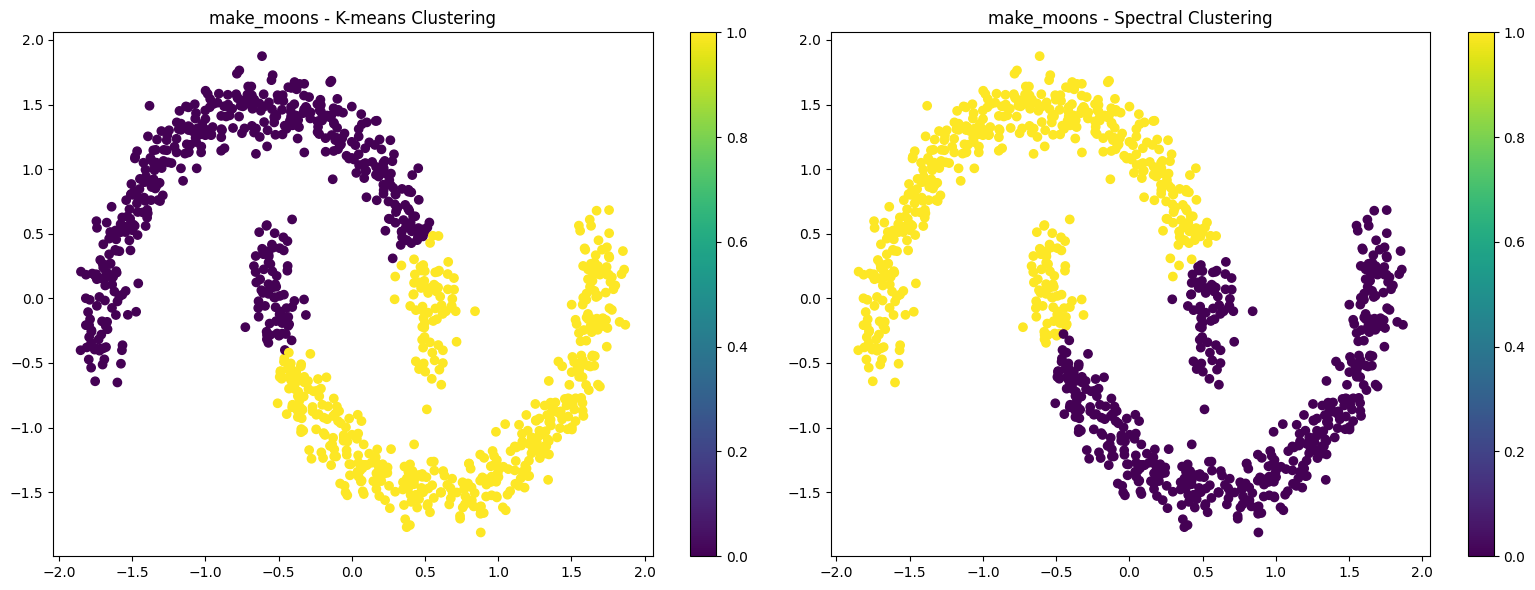

Phân tích trên bộ dữ liệu make_circles


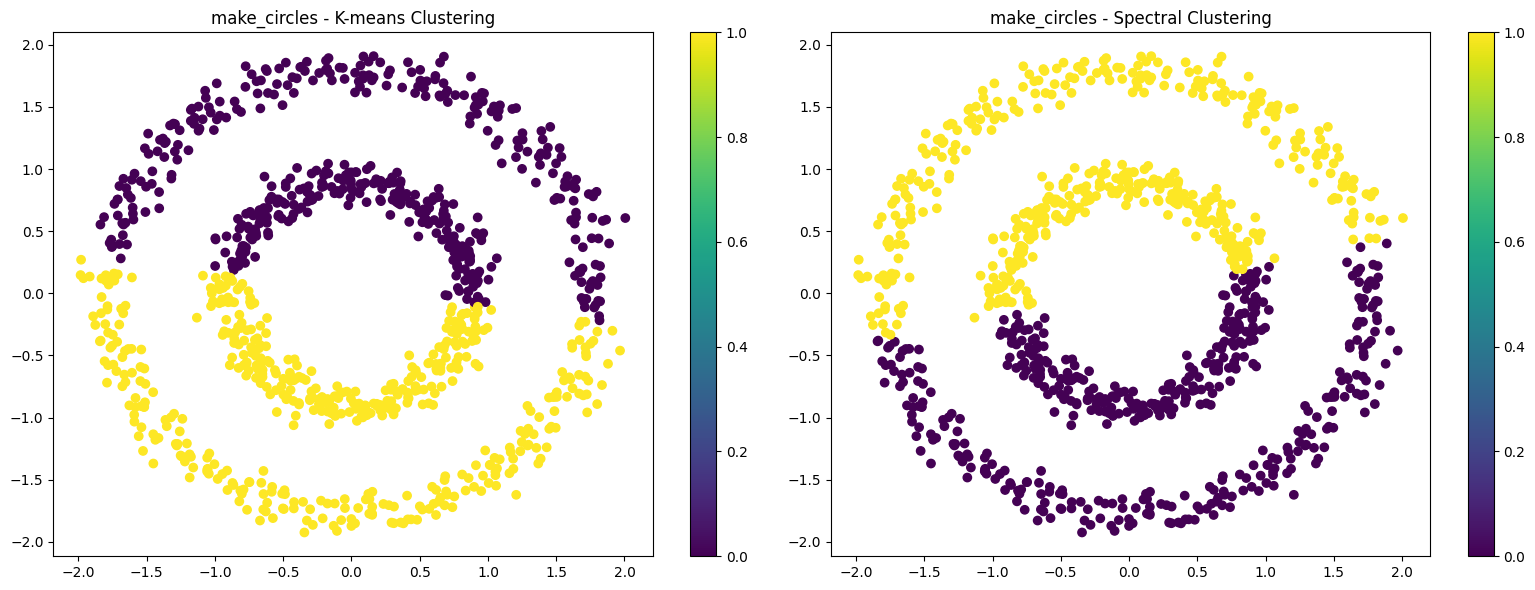

In [ ]:
# So sánh
print("Phân tích trên bộ dữ liệu make_moons")
compare_clustering_methods(X_moons_scaled, "make_moons")
print("Phân tích trên bộ dữ liệu make_circles")
compare_clustering_methods(X_circles_scaled, "make_circles")

Phân tích trên bộ dữ liệu make_moons


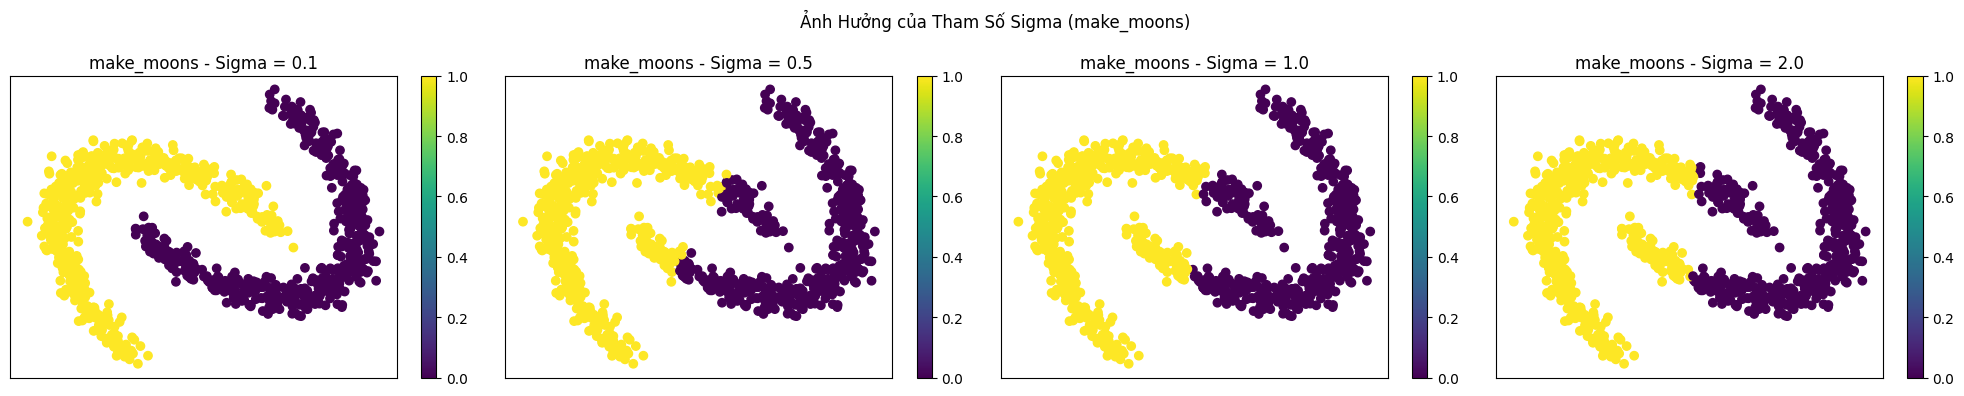

Phân tích trên bộ dữ liệu make_circles


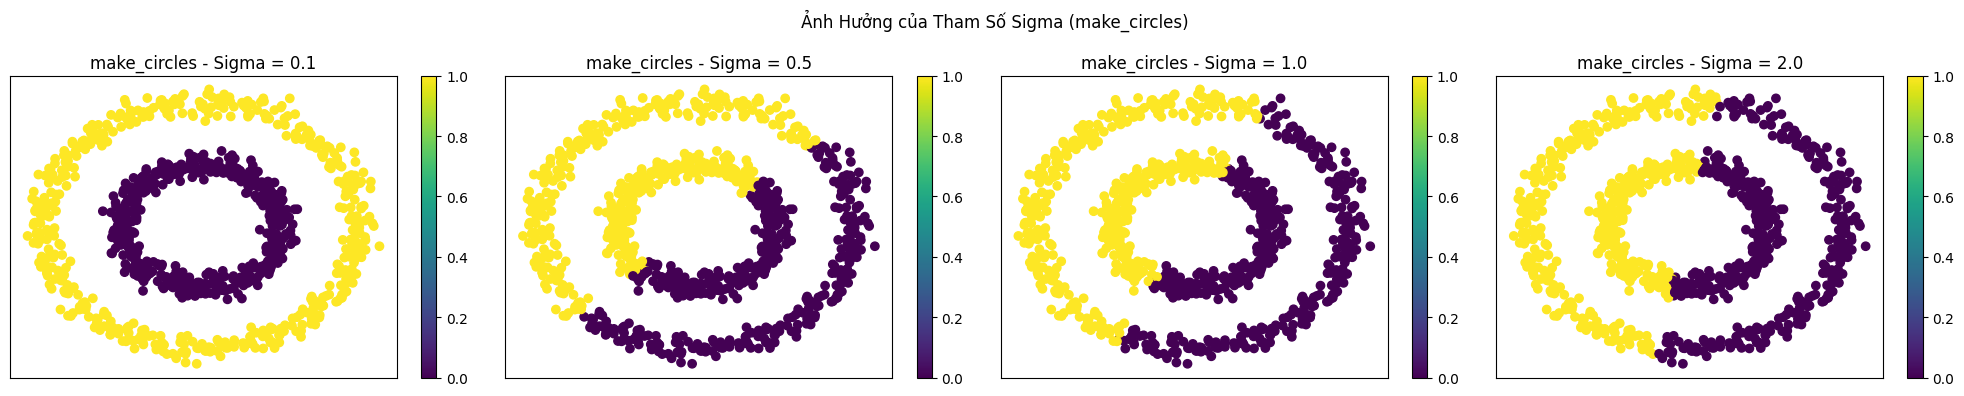

In [ ]:
# Ảnh hưởng của sigma
print("Phân tích trên bộ dữ liệu make_moons")
sigma_parameter_impact(X_moons_scaled, "make_moons")
print("Phân tích trên bộ dữ liệu make_circles")
sigma_parameter_impact(X_circles_scaled, "make_circles")

Phân tích trên bộ dữ liệu make_moons


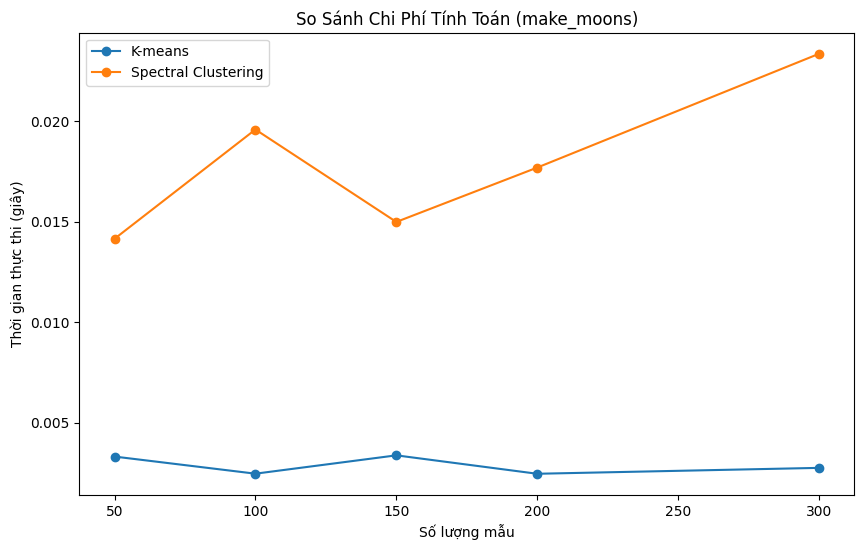

Phân tích trên bộ dữ liệu make_circles


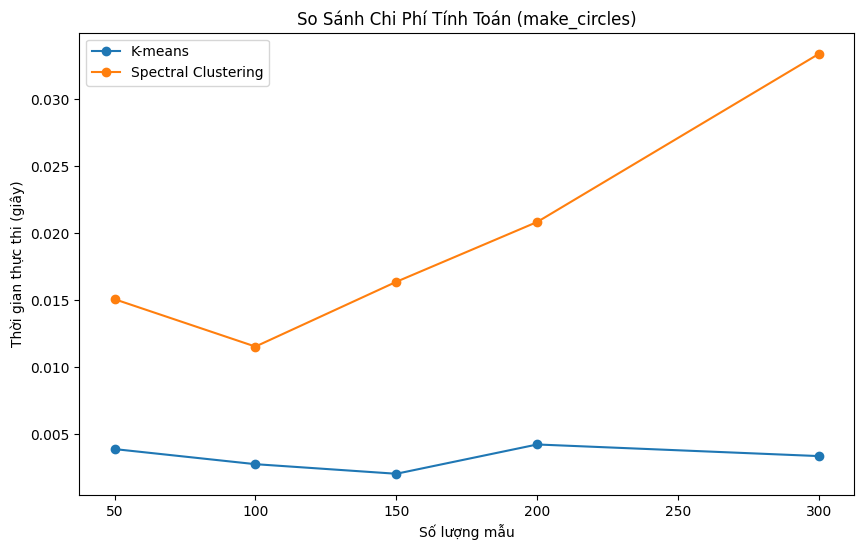

In [ ]:
# So sánh chi phí tính toán
print("Phân tích trên bộ dữ liệu make_moons")
computational_complexity(X_moons_scaled, "make_moons")
print("Phân tích trên bộ dữ liệu make_circles")
computational_complexity(X_circles_scaled, "make_circles")

# SO SÁNH

# So sánh với K - mean

In [ ]:
# Thêm thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [ ]:
# Thêm Circles và Moons dataset
def generate_plot_data():
    # Tạo dataset
    X_1, y_1 = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
    X_2, y_2 = make_moons(1000, noise=.07, random_state=0)

    # Biểu diễn Circles dataset
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(X_1[:, 0], X_1[:, 1], color='b')
    ax1.set_title("Circles Dataset")

    # Biểu diễn Moons dataset
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(X_2[:, 0], X_2[:, 1], color='b')
    ax2.set_title("Moons Dataset")
    return X_1, y_1, X_2, y_2

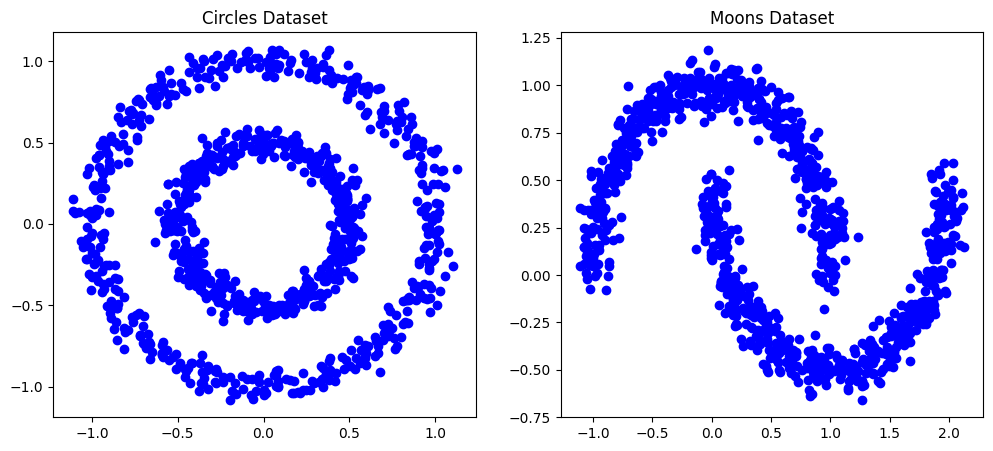

In [ ]:
X_1, y_1, X_2, y_2 = generate_plot_data()

In [ ]:
def compare_in_circles(X):
    # Khởi tạo thuật toán
    kmean = KMeans(n_clusters=2)
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)

    # Fit dữ liệu
    y_kmean = kmean.fit(X)
    y_spectral = spectral.fit(X)

    # Biểu diễn kết quả so sánh của K - mean trên Circles Dataset:
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(X[:, 0], X[:, 1], c = y_kmean.labels_, cmap='viridis')
    ax1.set_title("K-Means on the Circles Dataset")

    # Biểu diễn kết quả so sánh của Spectral Clustering trên Circles Dataset:
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(X[:, 0], X[:, 1], c = y_spectral.labels_, cmap='viridis')
    ax2.set_title("Spectral Clustering on the Circles Dataset")

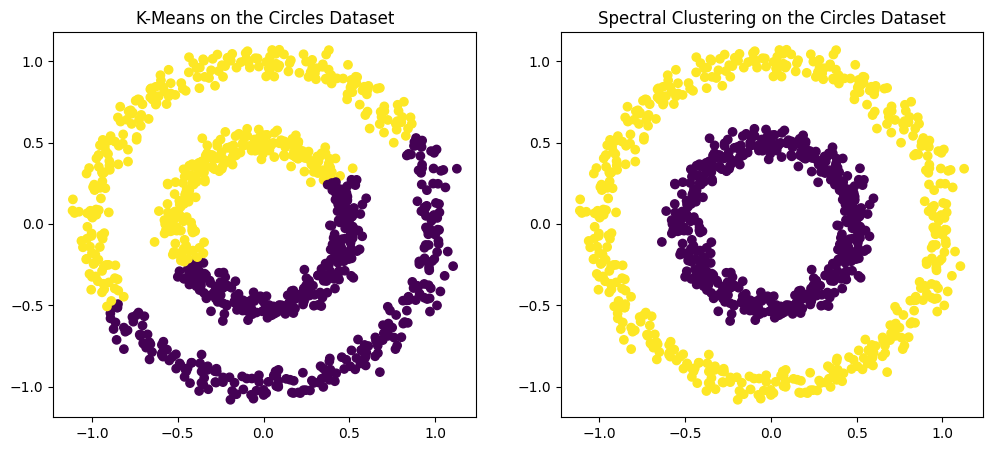

In [ ]:
# Chạy hàm so sánh
compare_in_circles(X_1)

In [ ]:
def compare_in_moons(X):
    # Khai báo thuật toán
    kmean = KMeans(n_clusters=2)
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)

    # Fit dữ liệu
    y_kmean = kmean.fit(X)
    y_spectral = spectral.fit(X)

    # Biểu diễn kết quả so sánh của K - mean trên Moons Dataset:
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(X[:, 0], X[:, 1], c = y_kmean.labels_, cmap='viridis')
    ax1.set_title("K-Means on the Moons Dataset")

    # Biểu diễn kết quả so sánh của Spectral Clustering trên Moons Dataset:
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(X[:, 0], X[:, 1], c = y_spectral.labels_, cmap='viridis')
    ax2.set_title("Spectral Clustering on the Moons Dataset")

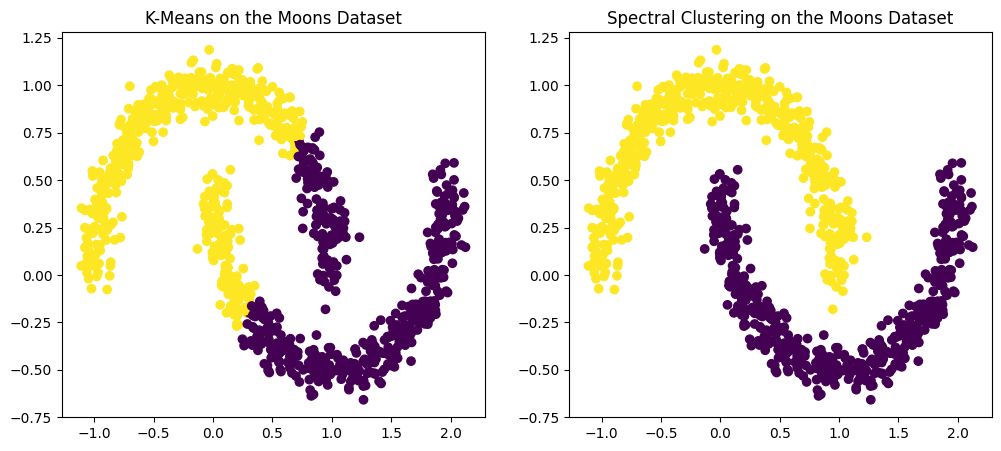

In [ ]:
# Chạy hàm so sánh
compare_in_moons(X_2)

# So sánh với Hierarchical Clustering

In [ ]:
# Thêm Noisy Circles và Noisy Moons dataset
def generate_plot_data_2():
    # Tạo dataset
    X_3, y_3 = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
    X_4, y_4 = make_moons(n_samples=500, noise=0.05, random_state=42)

    # Biểu diễn Noisy Circles dataset
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(X_3[:, 0], X_3[:, 1], color='b')
    ax1.set_title("Noisy Circles Dataset")

    # Biểu diễn Noisy Moons dataset
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(X_4[:, 0], X_4[:, 1], color='b')
    ax2.set_title("Noisy Moons Dataset")
    return X_3, y_3, X_4, y_4

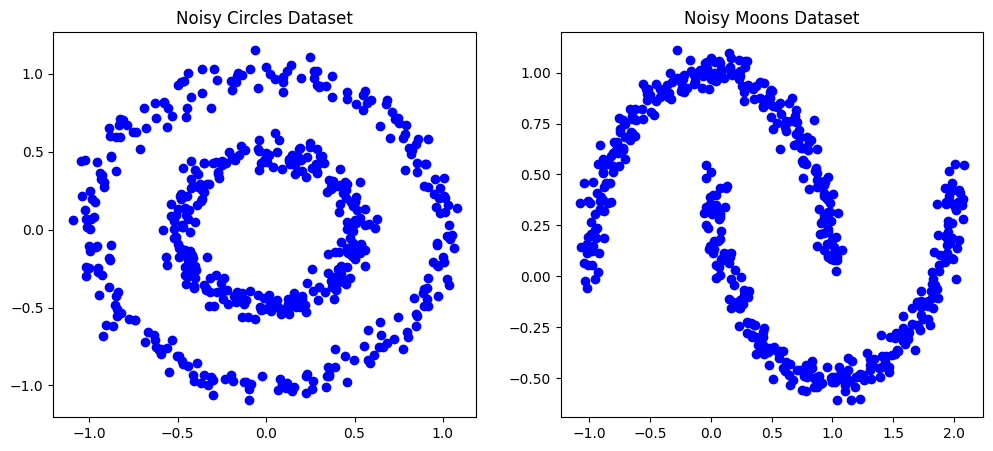

In [ ]:
X_3, y_3, X_4, y_4 = generate_plot_data_2()

In [ ]:
def compare_in_noisy_circles(X):
    # Khởi tạo các thuật toán
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
    hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')

    # Fit dữ liệu
    y_spectral = spectral.fit(X)
    y_hierarchical = hierarchical.fit(X)

    # Biểu diễn kết quả so sánh của Spectral Clustering trên Noisy Circles Dataset:
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(X[:, 0], X[:, 1], c = y_spectral.labels_, cmap='viridis')
    ax1.set_title("Spectral Clustering on Noisy Circles Dataset")

    # Biểu diễn kết quả so sánh của Hierarchical clustering trên Circles Dataset:
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(X[:, 0], X[:, 1], c = y_hierarchical.labels_, cmap='viridis')
    ax2.set_title("Hierarchical Clustering on Noisy Circles Dataset")

    plt.show()

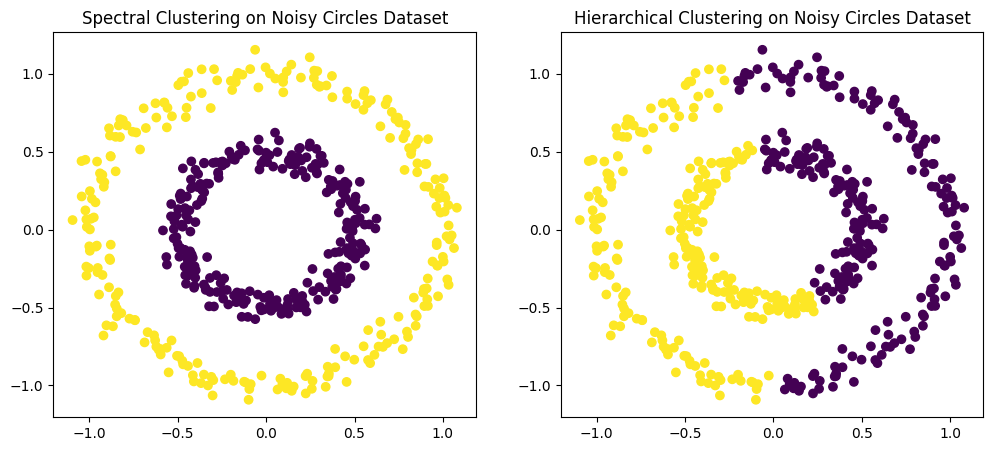

In [ ]:
# Chạy hàm so sánh
compare_in_noisy_circles(X_3)

In [ ]:
def compare_in_noisy_moons(X):
    # Khởi tạo các thuật toán
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
    hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')

    # Fit dữ liệu
    y_spectral = spectral.fit(X)
    y_hierarchical = hierarchical.fit(X)

    # Biểu diễn kết quả so sánh của Spectral Clustering trên Noisy Moons Dataset:
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(X[:, 0], X[:, 1], c = y_spectral.labels_, cmap='viridis')
    ax1.set_title("Spectral Clustering on Noisy Moons Dataset")

    # Biểu diễn kết quả so sánh của Hierarchical Clustering trên Noisy Moons Dataset:
    ax2 = fig.add_subplot(1,2,2)
    ax2.scatter(X[:, 0], X[:, 1], c = y_hierarchical.labels_, cmap='viridis')
    ax2.set_title("Hierarchical Clustering on Noisy Moons Dataset")

    plt.show()

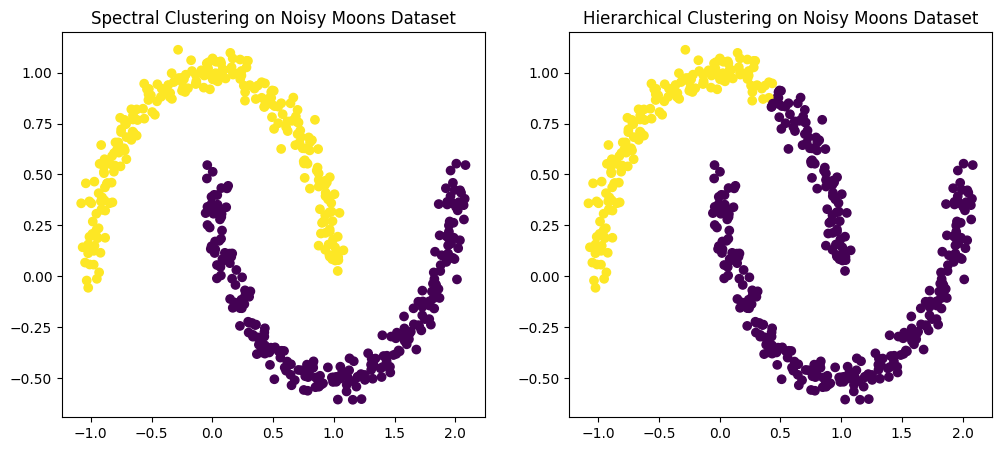

In [ ]:
# Chạy hàm so sánh
compare_in_noisy_moons(X_4)